In [13]:
# Load libraries
import pandas as pd
import datetime as dt

In [1]:
# Load files: dividends_latest.csv, earnings_latest.csv, intc.csv
dividends_data = pd.read_csv("data/kaggle/dividends_latest.csv") 
earnings_data  = pd.read_csv("data/kaggle/earnings_latest.csv") 
intc_data      = pd.read_csv("data/kaggle/intc.csv") 

In [2]:
# Select by date for 5-year range: 08/2014 to 08/2019
intc = intc_data.loc[intc_data['date'] > "2014-08-09"]

In [3]:
# Select dividends and earnings for: intc
symbol = "INTC"
dividends_intc = dividends_data.loc[dividends_data['symbol'] == symbol]
earnings_intc  = earnings_data.loc[earnings_data['symbol'] == symbol]

In [6]:
# Join files: dividends and earnings
result = intc.copy()

# Join with dividends
result = pd.merge(result,
                 dividends_intc[['date', 'dividend']],
                 on='date', how='left')

result['ex_dividend_date'] = (result['dividend'] >= 0)

# Join with earnings
result = pd.merge(result,
                 earnings_intc[['date', 'release_time']],
                 on='date', how='left')

result['earnings_date'] = (result['release_time'] == 'post')
result = result.drop(columns=['release_time'])

In [32]:
# Create new columns
result['Next Open']  = result['open'].shift(1)
result['Next Close'] = result['close'].shift(1)
result['Prev Open']  = result['open'].shift(-1)
result['Prev Close'] = result['close'].shift(-1)

# Create column: Quarter
def date_to_quarter(date):
    year,month,day = date.split('-')
    return pd.Timestamp(dt.date(int(year),int(month),int(day))).quarter
    
result['Quarter'] = result['date'].apply(lambda x: date_to_quarter(x))


In [31]:
val = result['date'][0]
val
year,month,day = val.split('-')

pd.Timestamp(dt.date(int(year),int(month),int(day))).quarter


3

In [33]:
# Save to csv
result.to_csv("data/intc_2014_to_2019.csv")

In [43]:
intc_data.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,INTC,2019-08-09,46.94,47.00,45.78,45.98,45.980,24409200,1.0
1,INTC,2019-08-08,46.16,47.37,45.91,47.17,47.170,30643700,1.0
2,INTC,2019-08-07,46.30,46.88,45.97,46.73,46.730,29440400,1.0
3,INTC,2019-08-06,47.15,47.56,46.77,46.96,46.960,26119600,1.0
4,INTC,2019-08-05,47.76,47.96,46.57,46.97,46.655,38936600,1.0


In [5]:
dividends_data.head()

,symbol,date,dividend
0,MSFT,2016-11-15,0.39
1,MSFT,2011-05-17,0.16
2,MSFT,2008-05-13,0.11
3,MSFT,2011-02-15,0.16
4,MSFT,2012-02-14,0.20


In [6]:
earnings_data.head()

,symbol,date,qtr,eps_est,eps,release_time
0,A,2009-05-14,04/2009,NaN,NaN,post
1,A,2009-08-17,07/2009,NaN,NaN,post
2,A,2009-11-13,10/2009,NaN,NaN,pre
3,A,2010-02-12,01/2010,NaN,NaN,pre
4,A,2010-05-17,04/2010,NaN,NaN,post


In [50]:
import yfinance as yf
data_orig = yf.download("AMD", start="2020-02-01", end="2020-02-25")
data = data_orig.copy()
print(data.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-02-03  46.400002  48.099998  46.230000  48.020000  48.020000  47077000
2020-02-04  49.209999  49.750000  48.610001  49.450001  49.450001  46302100
2020-02-05  50.290001  50.419998  49.310001  49.840000  49.840000  42737100
2020-02-06  48.799999  49.389999  47.630001  49.320000  49.320000  48670600
2020-02-07  48.910000  50.669998  48.639999  49.730000  49.730000  53107600


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2020-02-03 to 2020-02-25
Data columns (total 6 columns):
Open         16 non-null float64
High         16 non-null float64
Low          16 non-null float64
Close        16 non-null float64
Adj Close    16 non-null float64
Volume       16 non-null int64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes
None


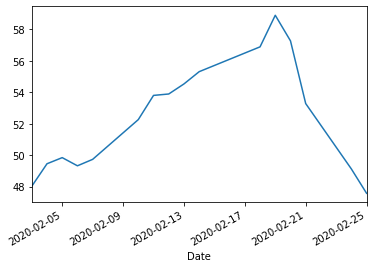

In [51]:
print(data.info())
data.Close.plot(kind='line')

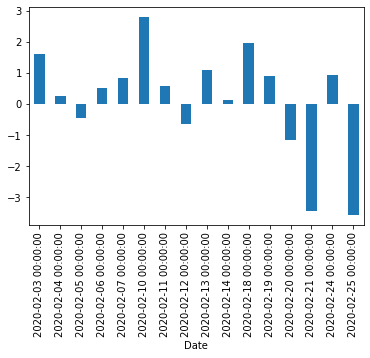

In [52]:
# Derived Data: Daily price change (dollar amount)
data['daily_price_abs'] = data['Close'] - data['Open']
data.daily_price_abs.plot(kind='bar')

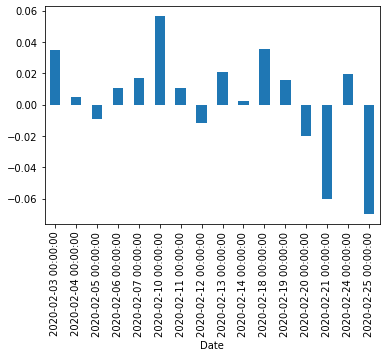

In [53]:
# Derived Data: Daily price change (percentage)
data['daily_price_per'] = (data['Close'] - data['Open'])/data['Open']
data.daily_price_per.plot(kind='bar')

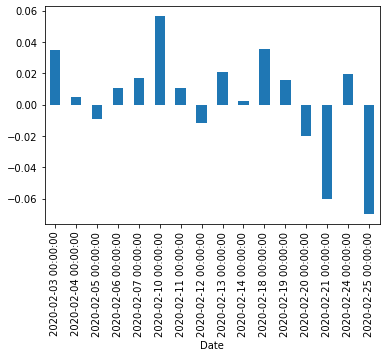

In [54]:
# Derived Data: Daily open-to-open price change (percentage)
data['open_day_before'] = data['Open'].shift(1)
data['open_to_open_per'] = (data['Open'] - data['open_day_before'])/data['Open']
data.daily_price_per.plot(kind='bar')

In [63]:
import datetime
from yahoo_earnings_calendar import YahooEarningsCalendar

my_custom_delay_s = 0.5
yec = YahooEarningsCalendar(my_custom_delay_s)

print(yec.get_next_earnings_date('box'))



1582675200


In [66]:
date_from = datetime.datetime.strptime(
    'Jan 1 2020  12:00AM', '%b %d %Y %I:%M%p')
date_to = datetime.datetime.strptime(
    'Feb 25 2020  12:00AM', '%b %d %Y %I:%M%p')
print(yec.earnings_between(date_from, date_to))

# TODO: Save each day's (or month's) earnings data to csv, to avoid slow response time of API call above.

[{'ticker': 'OHRP', 'companyshortname': 'OHR Pharmaceutical Inc', 'startdatetime': '2020-01-01T18:30:00.000Z', 'startdatetimetype': 'BMO', 'epsestimate': None, 'epsactual': None, 'epssurprisepct': None, 'gmtOffsetMilliSeconds': 0, 'quoteType': 'EQUITY'}, {'ticker': 'ACCR', 'companyshortname': 'Access-Power Inc', 'startdatetime': '2020-01-02T15:59:00.000Z', 'startdatetimetype': 'TNS', 'epsestimate': None, 'epsactual': None, 'epssurprisepct': None, 'gmtOffsetMilliSeconds': 0, 'quoteType': 'EQUITY'}, {'ticker': 'RECN', 'companyshortname': 'Resources Connection Inc', 'startdatetime': '2020-01-02T21:05:00.000Z', 'startdatetimetype': 'TAS', 'epsestimate': 0.3, 'epsactual': 0.38, 'epssurprisepct': 26.67, 'gmtOffsetMilliSeconds': 0, 'quoteType': 'EQUITY'}, {'ticker': 'LNDC', 'companyshortname': 'Landec Corp', 'startdatetime': '2020-01-02T21:05:10.000Z', 'startdatetimetype': 'TAS', 'epsestimate': -0.06, 'epsactual': -0.16, 'epssurprisepct': -166.67, 'gmtOffsetMilliSeconds': 0, 'quoteType': 'EQU

In [ ]:
date_from = datetime.datetime.strptime(
    'January 1 2020  10:00AM', '%b %d %Y %I:%M%p')
date_to = datetime.datetime.strptime(
    'May 8 2017  1:00PM', '%b %d %Y %I:%M%p')
yec = YahooEarningsCalendar()
print(yec.earnings_on(date_from))
print(yec.earnings_between(date_from, date_to))

In [73]:
YahooEarningsCalendar.earnings_between.__code__.co_varnames

('self', 'from_date', 'to_date', 'earnings_data', 'current_date', 'delta')